<a href="https://colab.research.google.com/github/23aswathy/paatshala/blob/main/Aswathy_G_Final_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries

In [1]:
import numpy as np
from numpy import percentile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading the dataset

In [2]:
from google.colab import files
files.upload()

Saving E_Commerce_Dataset.csv to E_Commerce_Dataset.csv


{'E_Commerce_Dataset.csv': b'CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount\r\n50001,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,160\r\n50002,1,,Phone,1,8,UPI,Male,3,4,Mobile,3,Single,7,1,15,0,1,0,121\r\n50003,1,,Phone,1,30,Debit Card,Male,2,4,Mobile,3,Single,6,1,14,0,1,3,120\r\n50004,1,0,Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134\r\n50005,1,0,Phone,1,12,CC,Male,,3,Mobile,5,Single,3,0,11,1,1,3,130\r\n50006,1,0,Computer,1,22,Debit Card,Female,3,5,Mobile Phone,5,Single,2,1,22,4,6,7,139\r\n50007,1,,Phone,3,11,Cash on Delivery,Male,2,3,Laptop & Accessory,2,Divorced,4,0,14,0,1,0,121\r\n50008,1,,Phone,1,6,CC,Male,3,3,Mobile,2,Divorced,3,1,16,2,2,0,123\r\n50009,1,13,Phone,3,9,E

In [ ]:
#reading the dataset using pandas and Exploratory Data analysis

In [3]:
data=pd.read_csv('E_Commerce_Dataset.csv')

In [ ]:
#Data analysis

In [4]:
data.shape

(5630, 20)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.0,16.00,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0,3.00,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.0,20.00,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.0,3.00,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.0,4.00,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.0,4.00,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.0,6.00,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


In [6]:
data.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
data.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
for i in data.columns:
    if data[i].dtypes == 'object':
        print(i)
        print('\n')
        print('the values are:') 
        print(data[i].value_counts())
        print('\n\n')

PreferredLoginDevice


the values are:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64



PreferredPaymentMode


the values are:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64



Gender


the values are:
Male      3384
Female    2246
Name: Gender, dtype: int64



PreferedOrderCat


the values are:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64



MaritalStatus


the values are:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64





In [9]:
df=data

In [ ]:
df.head()


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [ ]:
#missing value %

In [ ]:
# Loop over the columns in the DataFrame
percentage_of_null_values = ((df.isnull().sum())*100/len(df)).sort_values(ascending = False)
percentage_of_null_values

DaySinceLastOrder              5.452931
OrderAmountHikeFromlastYear    4.706927
Tenure                         4.689165
OrderCount                     4.582593
CouponUsed                     4.547069
HourSpendOnApp                 4.529307
WarehouseToHome                4.458259
CustomerID                     0.000000
MaritalStatus                  0.000000
Complain                       0.000000
NumberOfAddress                0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
Churn                          0.000000
NumberOfDeviceRegistered       0.000000
Gender                         0.000000
PreferredPaymentMode           0.000000
CityTier                       0.000000
PreferredLoginDevice           0.000000
CashbackAmount                 0.000000
dtype: float64

Text(0.5, 1.0, 'Bar plot showing Missing value %')

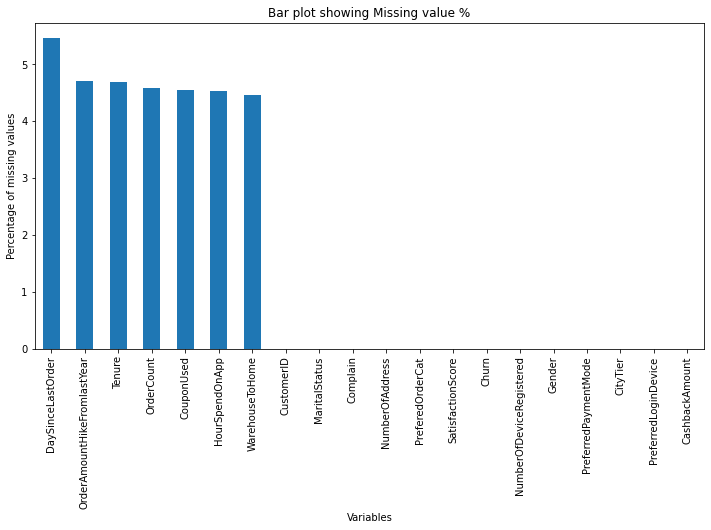

In [ ]:
percentage_of_null_values.plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Bar plot showing Missing value %')

In [ ]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                  220
dtype: int64

In [ ]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [10]:
cat = df.select_dtypes(include='object').columns #object type columns
num = list(df.select_dtypes(exclude='object').columns) #numerical type columns

In [11]:
for i in cat:
    print(i)
    print('\n')
    print(df[i].unique())
    print('\n\n')

PreferredLoginDevice


['Mobile Phone' 'Phone' 'Computer']



PreferredPaymentMode


['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']



Gender


['Female' 'Male']



PreferedOrderCat


['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']



MaritalStatus


['Single' 'Divorced' 'Married']





In [12]:
for i in num:
    print(i)
    print('\n')
    print(df[i].unique())

CustomerID


[50001 50002 50003 ... 55628 55629 55630]
Churn


[1 0]
Tenure


[ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
CityTier


[3 1 2]
WarehouseToHome


[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]
HourSpendOnApp


[ 3.  2. nan  1.  0.  4.  5.]
NumberOfDeviceRegistered


[3 4 5 2 1 6]
SatisfactionScore


[2 3 5 4 1]
NumberOfAddress


[ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]
Complain


[1 0]
OrderAmountHikeFromlastYear


[11. 15. 14. 23. 22. 16. 12. nan 13. 17. 18. 24. 19. 20. 21. 25. 26.]
CouponUsed


[ 1.  0.  4.  2.  9.  6. 11. nan  7. 12. 10.  5.  3. 13. 15.  8. 14. 16.]
OrderCount


[ 1.  6.  2. 15.  4.  7.  3.  9. nan 11.  5. 12. 10.  8. 13. 14. 16.]
DaySinceLastOrder


[ 5.  0.  3.  7.  2.  1.  8.  6.  4. 15.  9. 11. 10. nan 13. 1

In [ ]:
#Univariate analysis

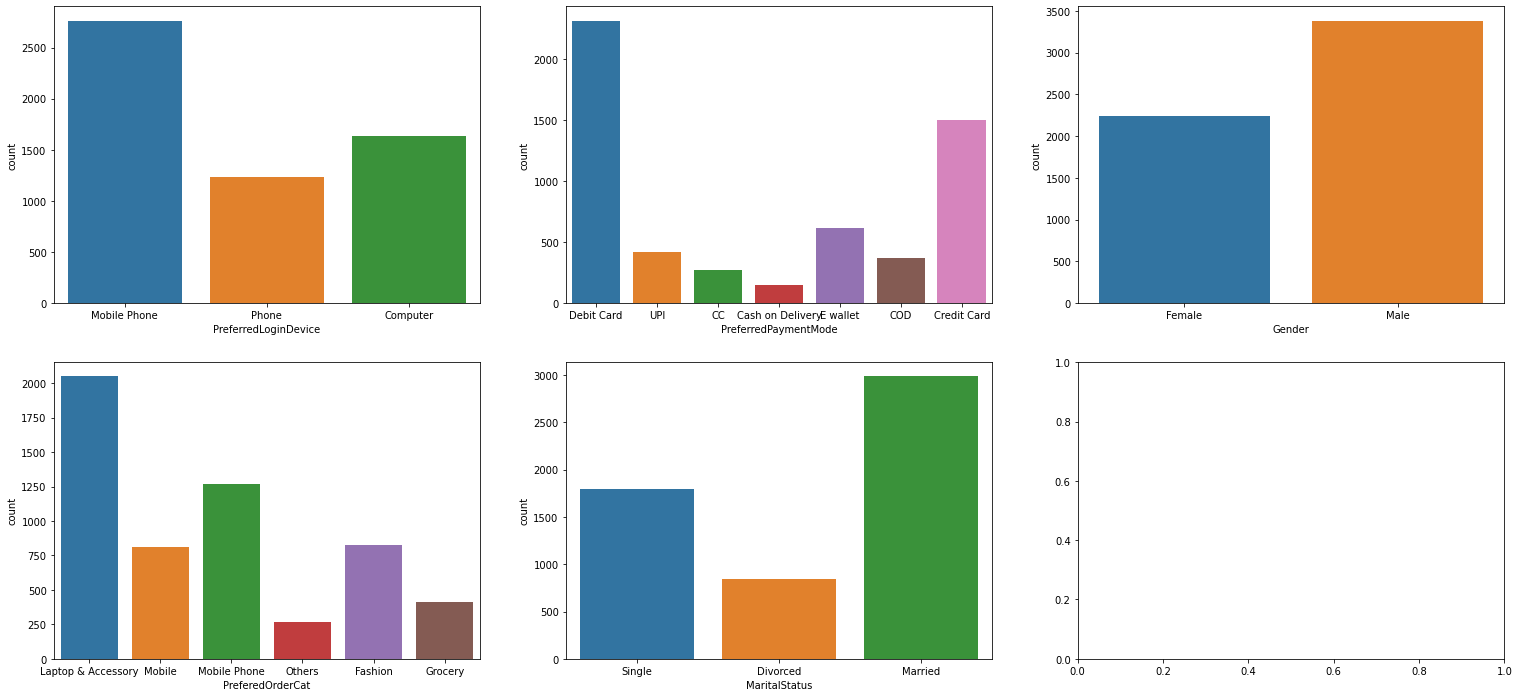

In [13]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(26,12))
for col,subplot in zip(cat, ax.flatten()):
    sns.countplot(x = df[col] , ax=subplot)

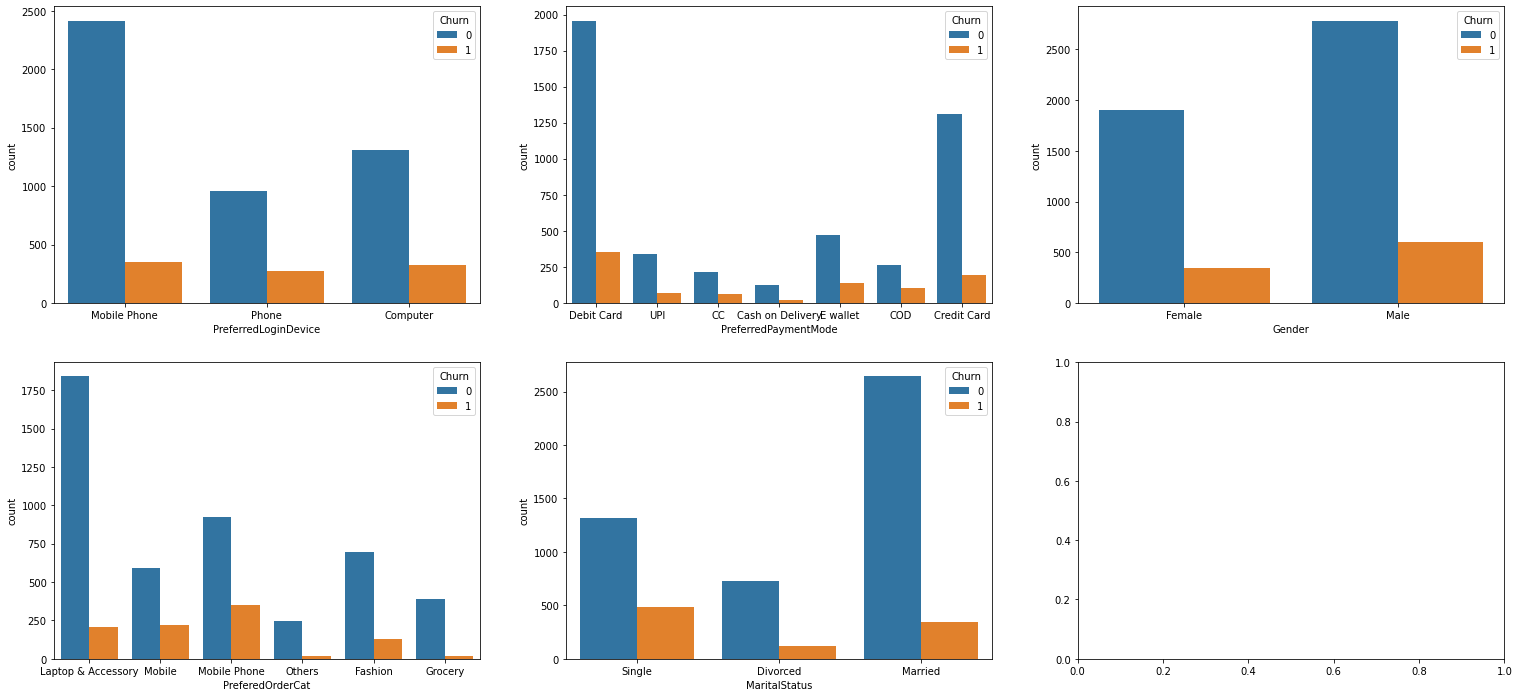

In [14]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(26,12))
for col,subplot in zip(cat, ax.flatten()):
    sns.countplot(x = df[col], hue=df.Churn, ax=subplot)

In [15]:
# defining a tuple for storing the dataframes in a containing information about the contribution each value to the customer churn.
# this was done so that we can quickly automate making such dataframes

d={}
for i in df.columns:
    d[i] = pd.concat([df.groupby(i).Churn.sum(),df[i].value_counts(),round(df.groupby(i).Churn.sum()*100/df[i].value_counts(),2)], axis=1)
    d[i].reset_index(level=0,inplace=True)
    d[i] = d[i].rename(columns = {'index':i, 'Churn':'Customers_churned', i:'Total_Customers', 0:'perc_of_total_cust'}, )
    

In [16]:
for i in df.columns:
    print(i)
    print('\n\n')
    print(d[i])
    print('\n\n')

CustomerID



      CustomerID  Customers_churned  Total_Customers  perc_of_total_cust
0          50001                  1                1               100.0
1          50002                  1                1               100.0
2          50003                  1                1               100.0
3          50004                  1                1               100.0
4          50005                  1                1               100.0
...          ...                ...              ...                 ...
5625       55626                  0                1                 0.0
5626       55627                  0                1                 0.0
5627       55628                  0                1                 0.0
5628       55629                  0                1                 0.0
5629       55630                  0                1                 0.0

[5630 rows x 4 columns]



Churn



   Churn  Total_Customers  Total_Customers  Total_Customers
0      0     

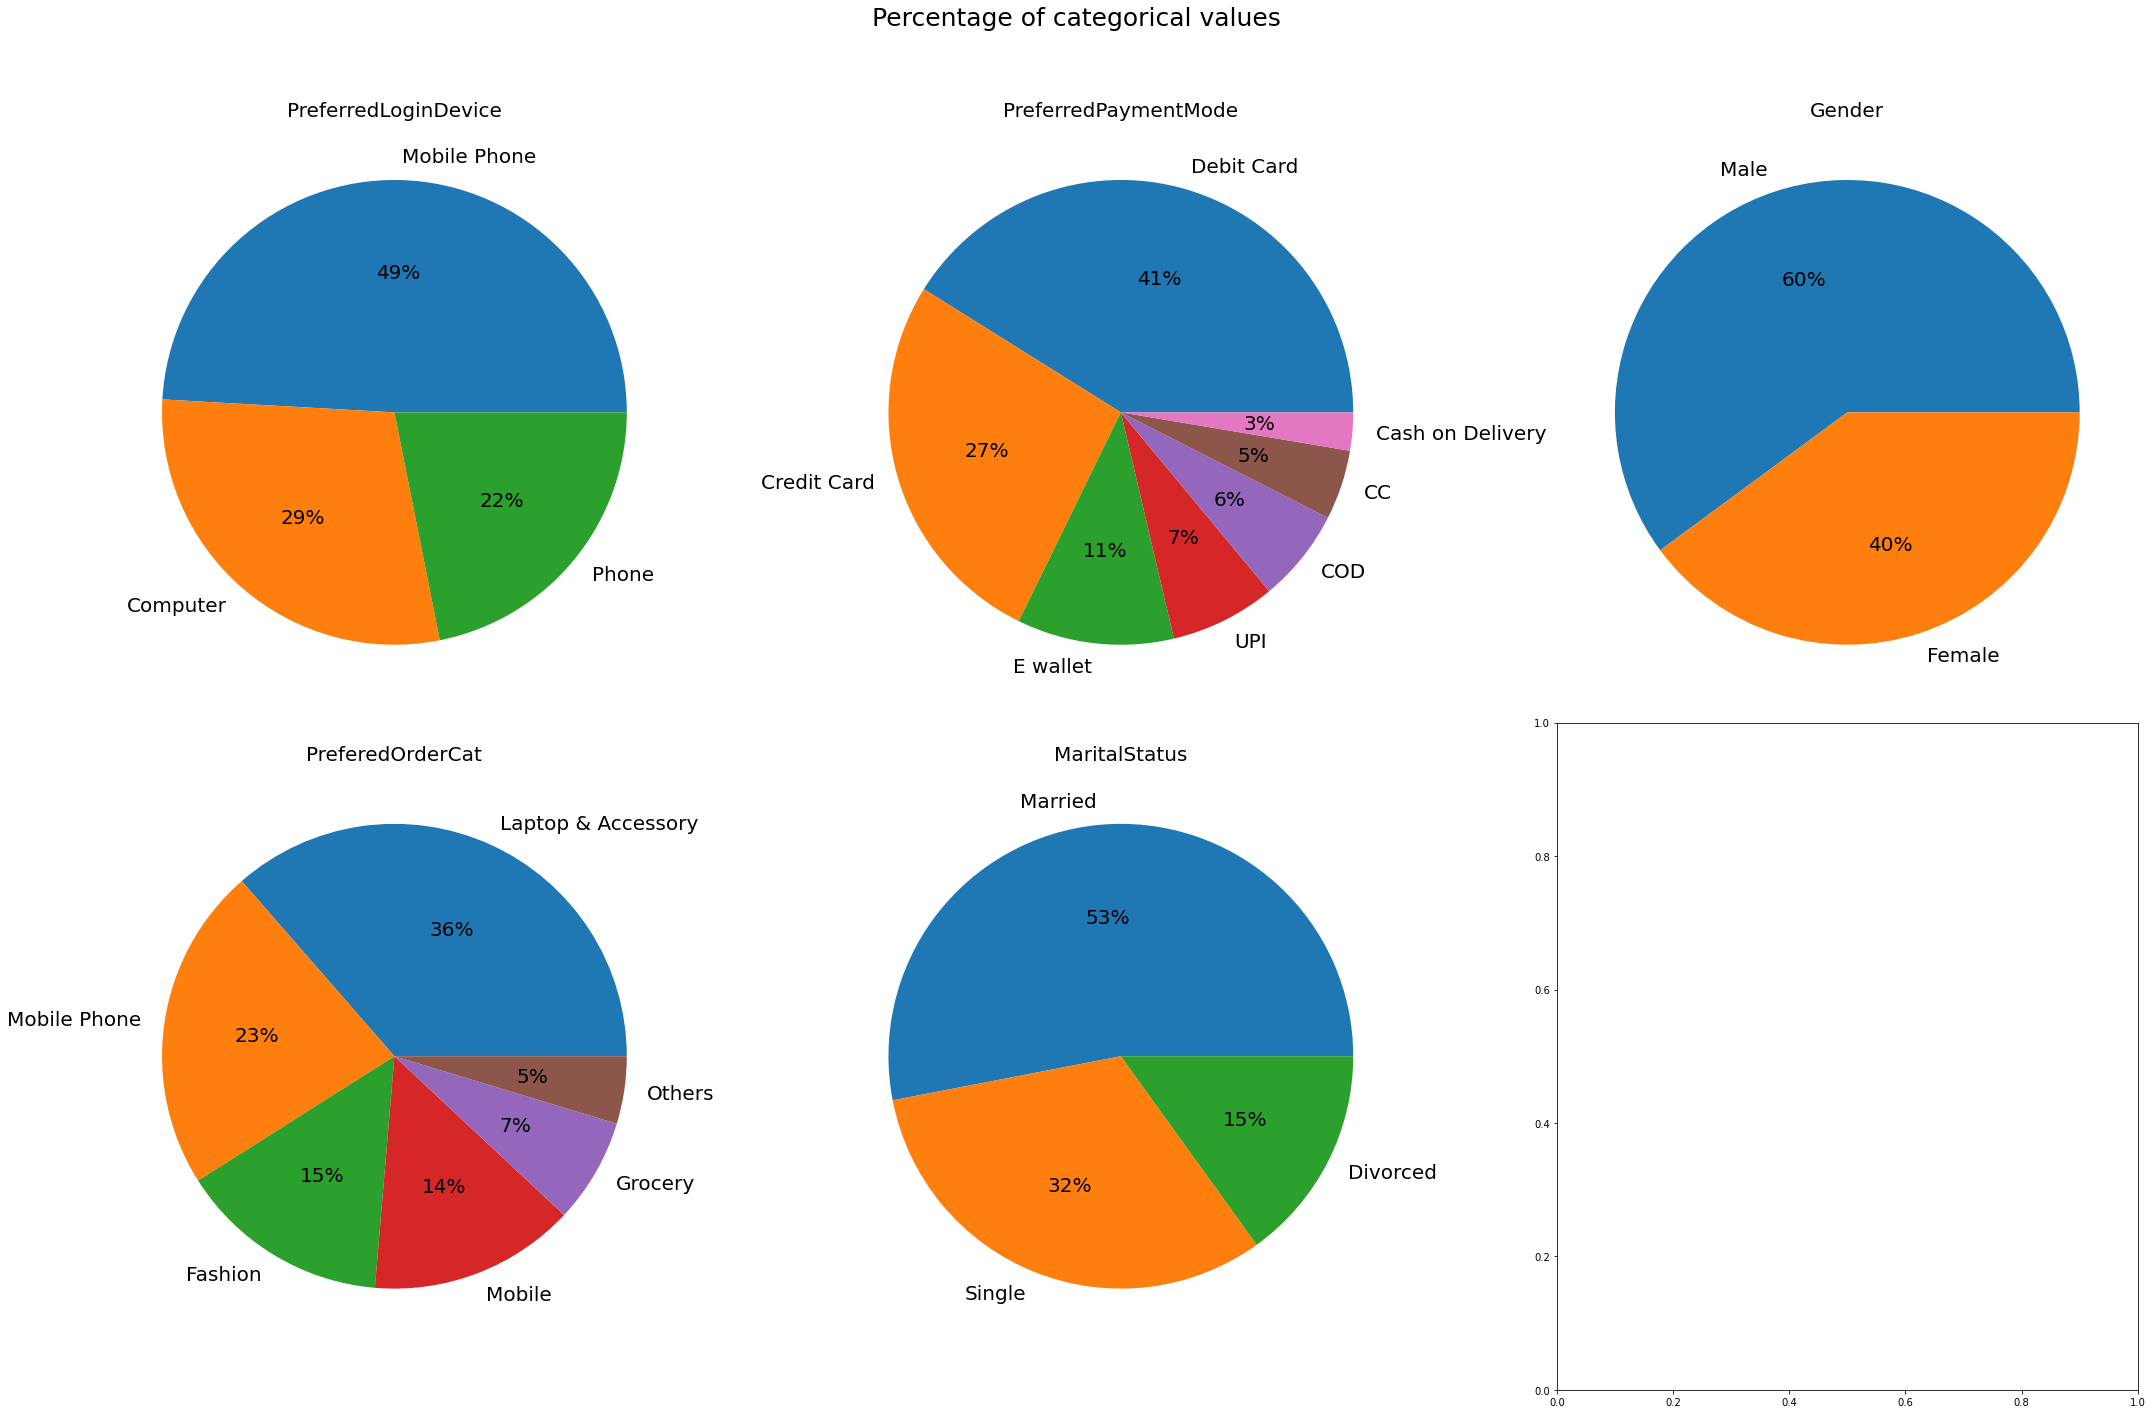

In [17]:
fig, ax = plt.subplots(2,3, figsize=(30, 20))
plt.suptitle("Percentage of categorical values\n\n",fontsize=25)

for col,subplot in zip(cat, ax.flatten()):
    #calculate percent
    temp = df[col].value_counts()
    #visualising the result
    subplot.pie(labels = temp.index, x = temp.values, autopct='%.0f%%',textprops={'fontsize': 20})
    subplot.set_title(col,fontsize=20) 
    plt.tight_layout()

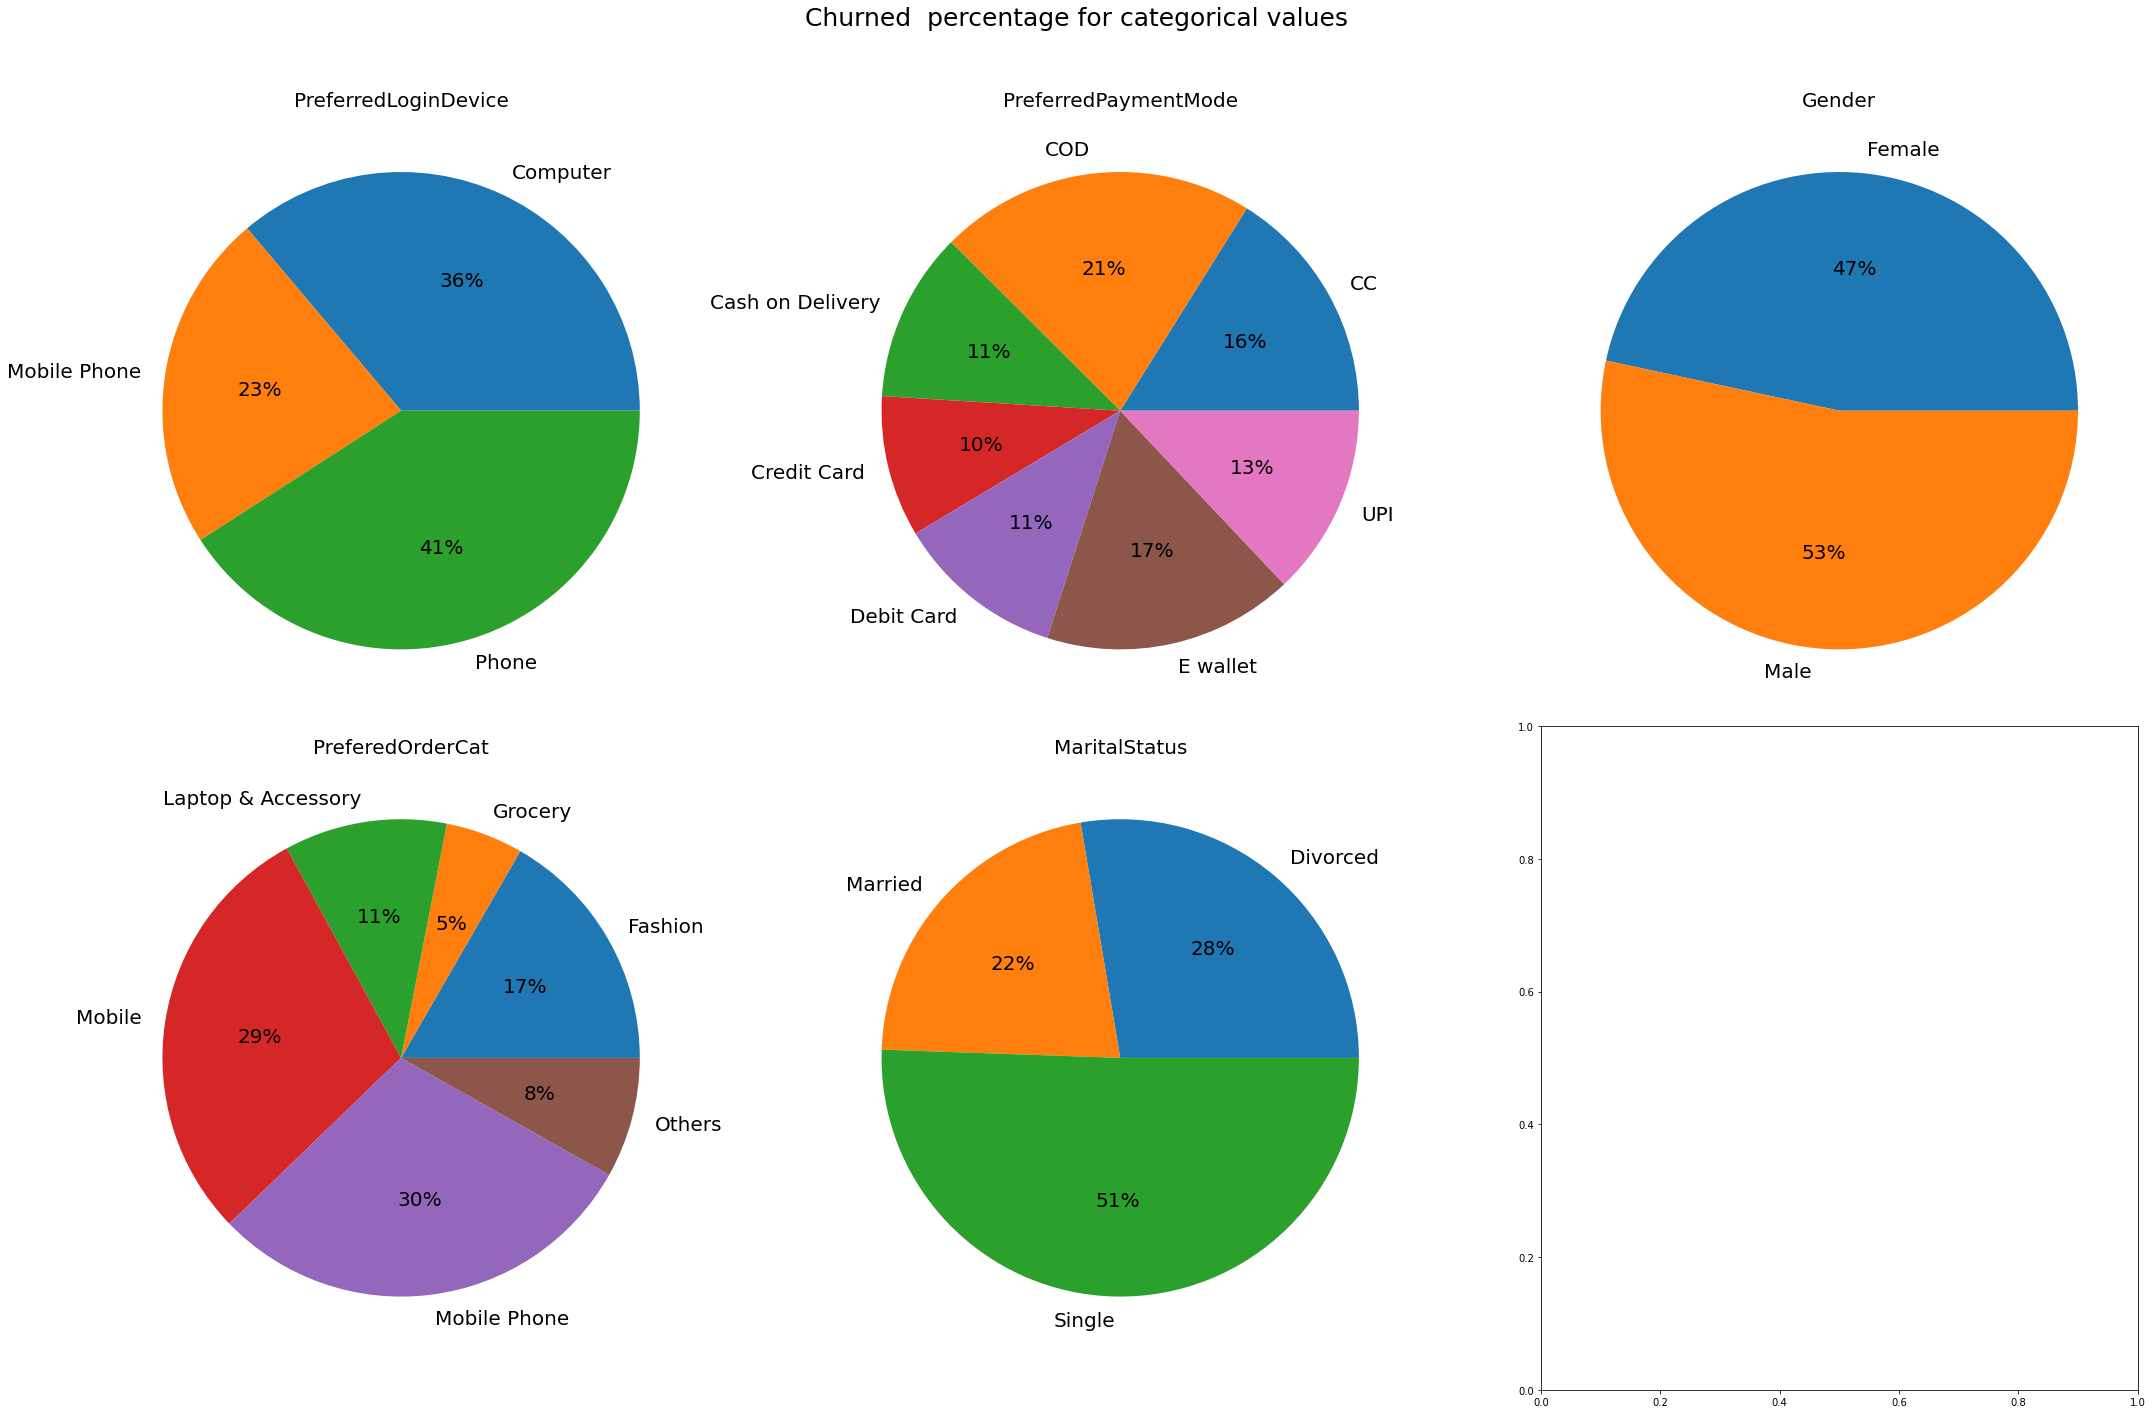

In [18]:
fig, ax = plt.subplots(2, 3, figsize=(30, 20))
plt.suptitle("Churned  percentage for categorical values\n\n",fontsize=25)
for col,subplot in zip(cat, ax.flatten()):
    #calculate percent churned 
    temp = df.groupby(col).Churn.sum()
    total = df[col].value_counts()
    res1 = temp/total*100
    #visualising the result
    subplot.pie(labels = res1.index, x = res1.values, autopct='%.0f%%',textprops={'fontsize': 20})
    subplot.set_title(col,fontsize=20) 
    plt.tight_layout()

In [ ]:
''
#Customer who are using computer has churned more than mobile phone
#Customers who preferred Cash on delivery & e- wallet payment mode  churned more
#Males have churned more
#Customers those who bought mobile phone churned more
#Single customers have churned more
#Those who made complaints have churned more

In [25]:
df=data

In [24]:
#BIVARIANT ANALYSIS

# Feature extraction of Customer Demography
custdemo = [ 'CityTier', 'Gender', 'MaritalStatus', 'NumberOfAddress', 'NumberOfDeviceRegistered','WarehouseToHome']
# Feature extraction of Customer Purchasing Behaviour
custbehv = [ 'Tenure', 'PreferredLoginDevice', 'PreferredPaymentMode', 'HourSpendOnApp', 'PreferedOrderCat', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 
            'DaySinceLastOrder',]
# Feature extraction of Customer Review
cust_rev = ['SatisfactionScore', 'Complain','CashbackAmount']

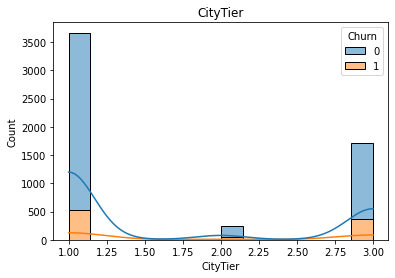

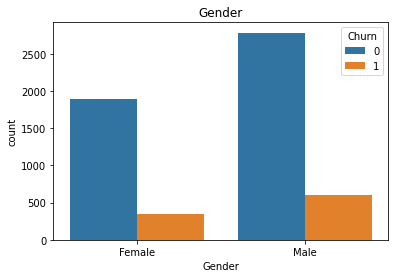

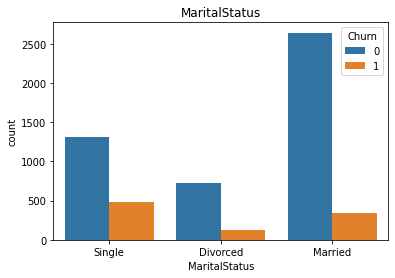

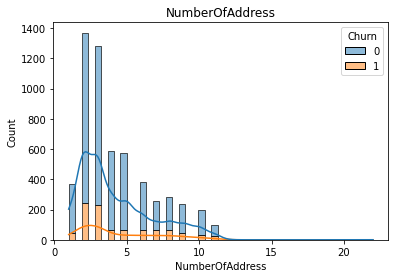

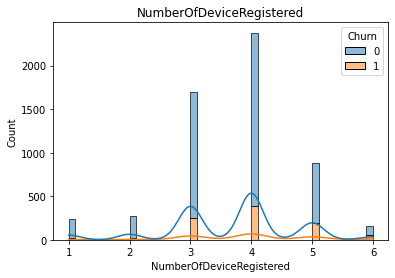

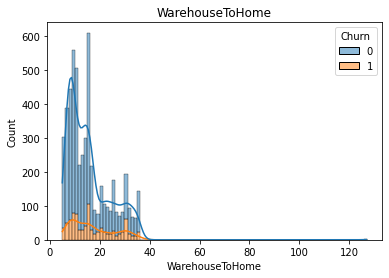

In [ ]:
for i in df[custdemo].columns:
  # Checking if the datatype of the feature is 'object'
  if(df[i].dtype == 'object'):    
    plt.title(i)
    sns.countplot(df[i], hue = df['Churn'], dodge=True)
    plt.show()
  else:
    # Setting the title of the plot as the name of the feature
    plt.title(i)
    sns.histplot(x=df[i], hue = df['Churn'], data = df, multiple = 'stack', kde=True)
    plt.show()

In [ ]:
#inferences
#CityTier : Frequency of churn is higher in  Tier 1 cities
#Gender : Frequency of churn is higher for males
#MaritalStatus : Frequency of churn higher for single customer
#NumberofAddress : Frequency of churn is higher for 2 & 3 number of address customers
#NumberofDevice : Frequency of churn higher for customers with 3, 4 & 5 devices
#WarehouseToHome : Frequency of churn is higher for customers whose house is close to warehouse.

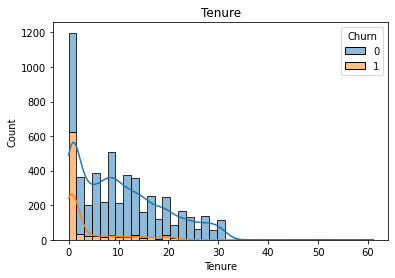

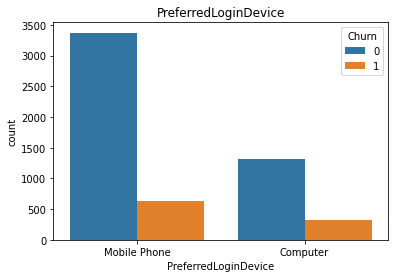

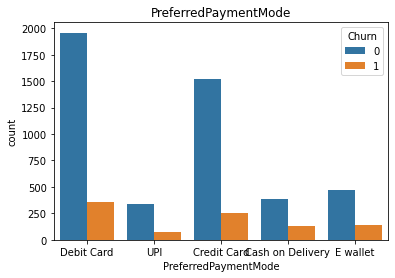

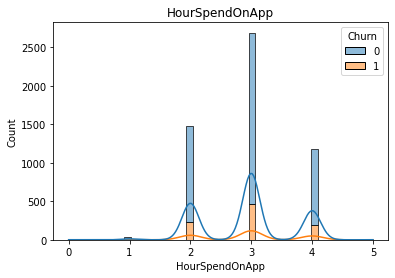

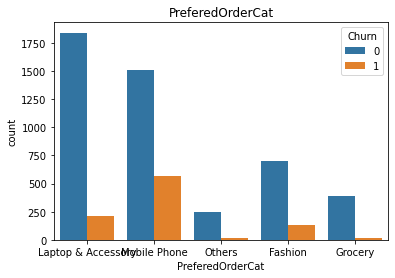

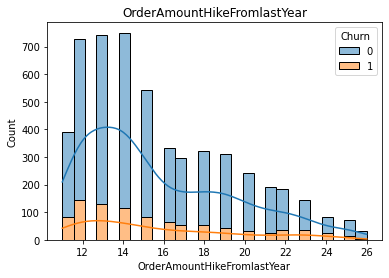

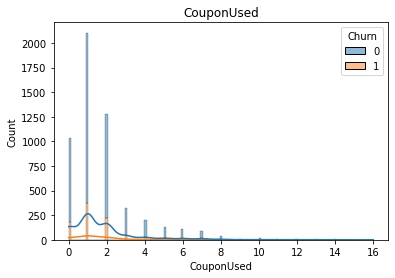

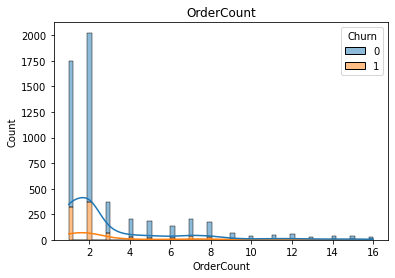

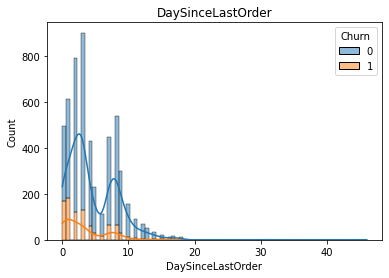

In [ ]:
for i in df[custbehv].columns:
  # Checking if the datatype of the feature is 'object'
  if(df[i].dtype == 'object'):    
    plt.title(i)
    sns.countplot(df[i], hue = df['Churn'], dodge=True)
    plt.show()
  else:
    # Setting the title of the plot as the name of the feature
    plt.title(i)
    sns.histplot(x=df[i], hue = df['Churn'], data = df, multiple = 'stack', kde=True)
    plt.show()

In [ ]:
#Tenure : Frequency of churn is higher for tenure 0,1 customers
#PreferredLoginDevice : There is no singificant difference between all devices
#PreferredPaymentMethod : : Frequency of churn is higher for customer paying with debit card
#HoursSpendonApp : Frequency of churn is higher for customer spending 3 hours using the app
#PreferredOrderCat : Frequency of churn is higher for customer preferring mobile phone
#OrderAmountHikeFromLastYear : Frequency of churn is higher for customer has 12 & 14 amount of order hike from last year
#CouponUsed : Frequency of churn is higher for customer using 1 coupon
#OrderCount : Frequency of churn is higher for customer ordering 2 items
#DaySinceLastOrder : Frequency of churn is higher for customer who in last 0 and 1 day ordering items

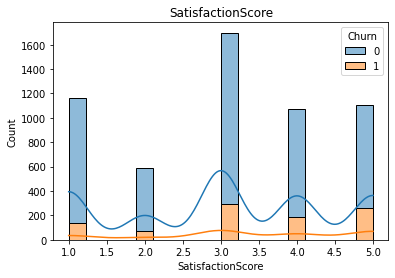

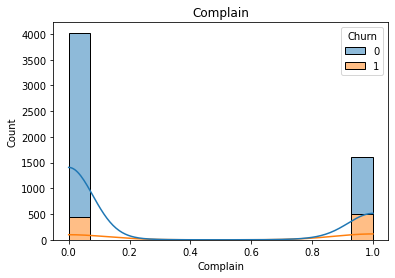

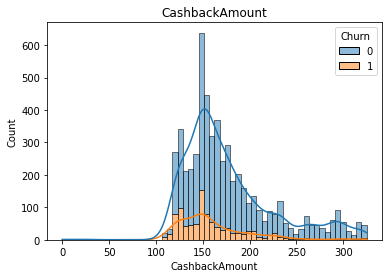

In [27]:
for i in df[cust_rev].columns:
  # Checking if the datatype of the feature is 'object'
  if(df[i].dtype == 'object'):    
    plt.title(i)
    sns.countplot(df[i], hue = df['Churn'], dodge=True)
    plt.show()
  else:
    # Setting the title of the plot as the name of the feature
    plt.title(i)
    sns.histplot(x=df[i], hue = df['Churn'], data = df, multiple = 'stack', kde=True)
    plt.show()

In [ ]:
#SatisfactionScore : Frequency of churn is higher for  customers giving 3.0 satisfaction score
#Complain : Frequency of churn is higher for customers frequently  giving complaints
#Cash back amount:Frequency of churn is higher for customers getting Cashback amount  of 150

In [ ]:
df1=df.drop('CustomerID',axis=1)

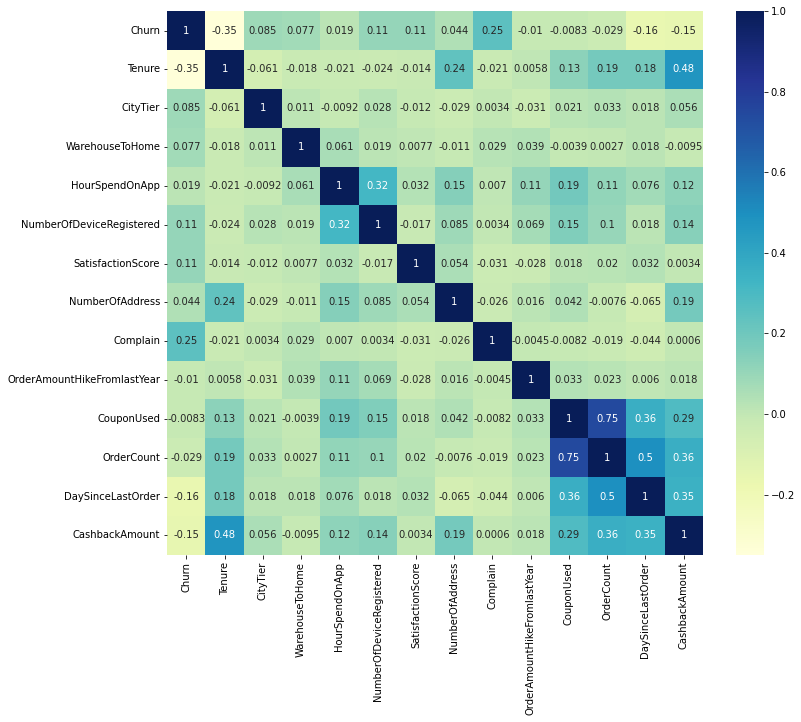

In [ ]:
fig = plt.figure(figsize= (12, 10))
corr_df = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)

In [ ]:
#There is high correlation between OrderCount and CoupunUsed=0.75
#There is moderate correlation between CashbackAmount and Tenure=0.48
#There is moderate correlation between Cashback amount and order count=0.36
##There is moderate correlation between Cashback amount and Day since last order=0.35
#Moderate correaltion exist  between Complain and Churn =0.25


In [ ]:
#Data cleaning

In [ ]:
#handling missing values for numerical columns

In [ ]:
#count the total number of missing values in the dataset
print(f'The number of missing values: {df.isnull().sum().sum()}')
#count the number of rows with missing values
print(f'The number of rows with missing values: {df[df.isnull().any(axis=1)].shape[0]}')

The number of missing values: 1856
The number of rows with missing values: 1856


In [ ]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].median(),inplace=True)

In [ ]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [ ]:
print(f'The number of rows with missing values: {df[df.isnull().any(axis=1)].shape[0]}')

The number of rows with missing values: 0


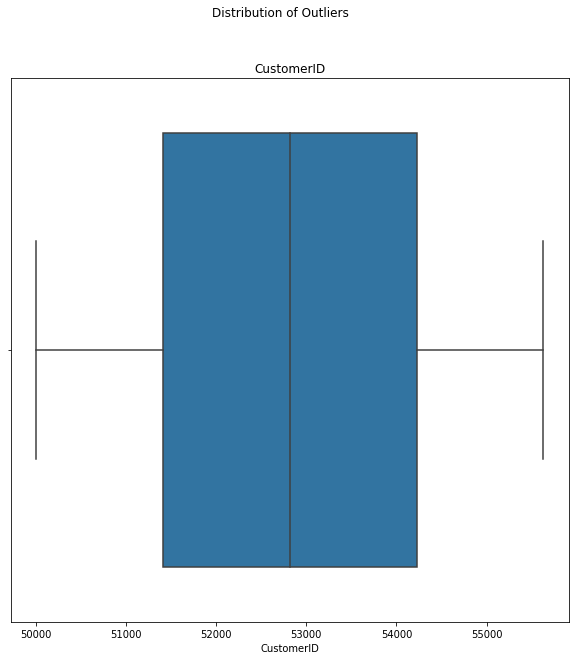

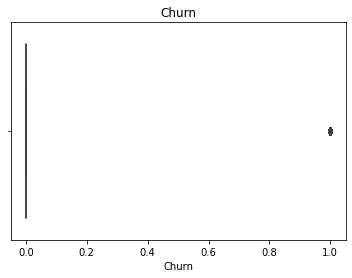

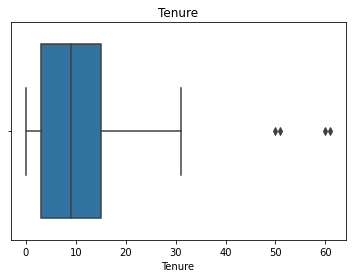

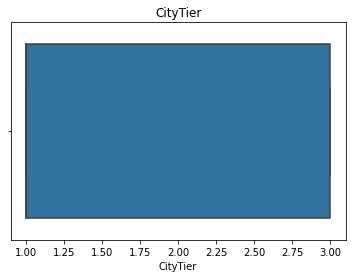

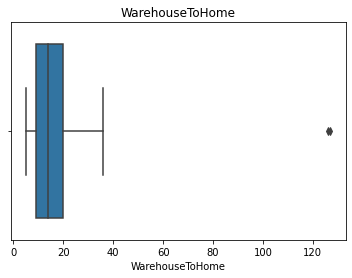

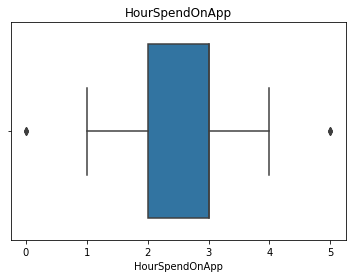

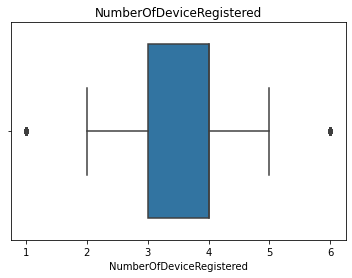

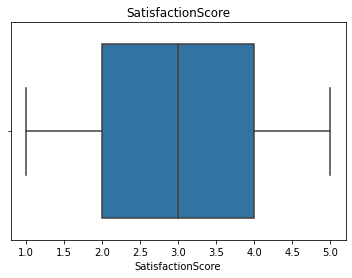

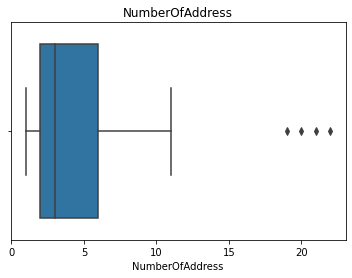

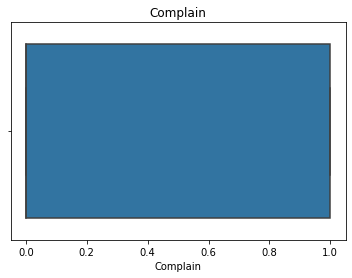

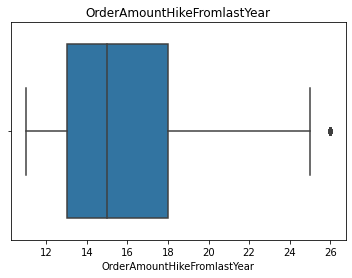

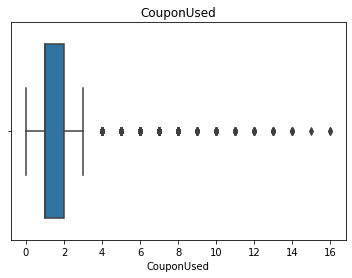

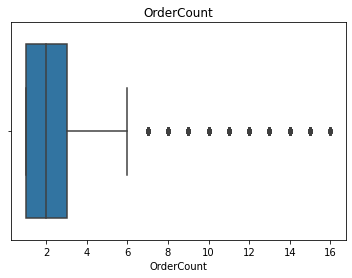

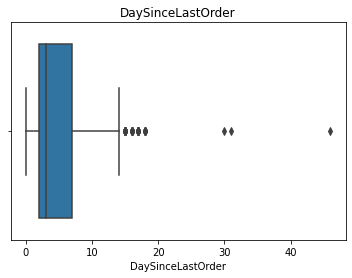

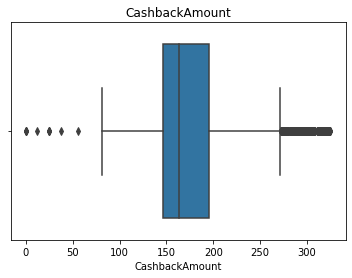

In [ ]:
# Loop over the columns in the DataFrame
plt.figure(figsize=(10,10))
plt.suptitle("Distribution of Outliers")
for i in df.columns:
   if((df[i].dtype == 'int64') | (df[i].dtype == 'float64')):
    # Set the title of the plot to the name of the column
    plt.title(i)
    sns.boxplot(df[i])
    plt.show()

In [ ]:
df.PreferredLoginDevice.replace('Phone','Mobile Phone',inplace = True)
df.PreferredPaymentMode .replace(['CC','COD'],['Credit Card','Cash on Delivery'],inplace = True)
df.PreferedOrderCat.replace('Mobile','Mobile Phone',inplace = True)

In [ ]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print('\n')
        print('the values are:')
        print(data[i].value_counts())
        print('\n\n')

PreferredLoginDevice


the values are:
Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64



PreferredPaymentMode


the values are:
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64



Gender


the values are:
Male      3384
Female    2246
Name: Gender, dtype: int64



PreferedOrderCat


the values are:
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64



MaritalStatus


the values are:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64





In [ ]:
df.head(10)

In [ ]:
#Handling the outliers

In [ ]:
#Cashbackamount feature relatively has high significance number of outliers compared to others.

In [ ]:
#Outliers : IQR Methods
#We will be using IQR methods for detecting outliers on Cashbackamount

In [ ]:
df2 = df.copy()

In [ ]:
# Calculating the interquartile range (IQR) of the column 'CashbackAmount' in the dataframe df2
# 25th percentile value
#q25 = percentile(df2['CashbackAmount'], 25) 
# 75th percentile value
#q75 = percentile(df2['CashbackAmount'], 75)
# Interquartile range
#iqr = q75 - q25

# Calculating the cutoff value using 1.5 times the IQR
#cutoff = 1.5 * iqr

In [ ]:
# Calculating the lower limit using the 25th percentile value minus the cutoff value
#lower = q25 - cutoff
# Calculating the upper limit using the 75th percentile value plus the cutoff value
#upper = q75 + cutoff


In [ ]:
# Printing the lower and upper limits
#print(f'The Lower Limit is : {lower}, The Upper Limit is : {upper}')

The Lower Limit is : 92.0, The Upper Limit is : 236.0


In [ ]:
#print('The Number of Above Upper Limits :' ,len(df2[df2['CashbackAmount'] > upper]))
#print('The Number of Below Lower Limits :' ,len(df2[df2['CashbackAmount'] < lower]))

The Number of Above Upper Limits : 269
The Number of Below Lower Limits : 12


In [ ]:
#median = np.median(df2['CashbackAmount'])

In [ ]:
#df2['CashbackAmount'] = np.where(df2['CashbackAmount'] > upper, median, df2['CashbackAmount'])

In [ ]:
#df = df2.copy()

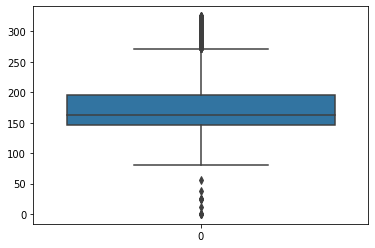

In [ ]:
sns.boxplot(df['CashbackAmount'])
plt.show()

In [ ]:
## Select all continuous numerical features
cnum_features = ['Tenure','WarehouseToHome','CashbackAmount','OrderAmountHikeFromlastYear','HourSpendOnApp']
df2['Tenure']=df2['Tenure']+1
df2['HourSpendOnApp']=df2['HourSpendOnApp']+1
df2['CashbackAmount']=df2['CashbackAmount']+1


# Loop through each curve and transform it
for i in cnum_features:
    df2[f'{i}_l10'] = np.log10(df2[i])
    
    # Drop out the original columns
    df2.drop(columns=[i],inplace=True)
    


In [ ]:
df2.head()

,CustomerID,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,CouponUsed,OrderCount,DaySinceLastOrder,Tenure_l10,WarehouseToHome_l10,CashbackAmount_l10,OrderAmountHikeFromlastYear_l10,HourSpendOnApp_l10
0,50001,1,Mobile Phone,3,Debit Card,Female,3,Laptop & Accessory,2,Single,9,1,1.0,1.0,5.0,0.845098,0.778151,2.206826,1.041393,0.778151
1,50002,1,Mobile Phone,1,UPI,Male,4,Mobile Phone,3,Single,7,1,0.0,1.0,0.0,1.079181,0.903090,2.086360,1.176091,0.778151
2,50003,1,Mobile Phone,1,Debit Card,Male,4,Mobile Phone,3,Single,6,1,0.0,1.0,3.0,1.079181,1.477121,2.082785,1.146128,0.698970
3,50004,1,Mobile Phone,3,Debit Card,Male,4,Laptop & Accessory,5,Single,8,0,0.0,1.0,3.0,0.477121,1.176091,2.130334,1.361728,0.698970
4,50005,1,Mobile Phone,1,Credit Card,Male,3,Mobile Phone,5,Single,3,0,1.0,1.0,3.0,0.477121,1.079181,2.117271,1.041393,0.778151


In [ ]:
df=df2.copy()

In [ ]:
#Encoding the categorical feature

In [ ]:
#Feature Encoding 

In [ ]:
for i in df.columns:
  if(df[i].dtypes == 'object'):
    print(i)
    print(df[i].nunique())

PreferredLoginDevice
2
PreferredPaymentMode
5
Gender
2
PreferedOrderCat
5
MaritalStatus
3


In [ ]:
df_new=df

In [ ]:
le = LabelEncoder()
df_new['Gender'] = le.fit_transform(df_new['Gender'])


In [ ]:
df_new.head(5)

,CustomerID,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,...,Complain,CouponUsed,OrderCount,DaySinceLastOrder,Tenure_l10,WarehouseToHome_l10,CashbackAmount_l10,OrderAmountHikeFromlastYear_l10,HourSpendOnApp_l10,PreferredLoginDevice
0,50001,1,Mobile Phone,3,Debit Card,0,3,Laptop & Accessory,2,Single,...,1,1.0,1.0,5.0,0.845098,0.778151,2.206826,1.041393,0.778151,1
1,50002,1,Mobile Phone,1,UPI,1,4,Mobile Phone,3,Single,...,1,0.0,1.0,0.0,1.079181,0.903090,2.086360,1.176091,0.778151,1
2,50003,1,Mobile Phone,1,Debit Card,1,4,Mobile Phone,3,Single,...,1,0.0,1.0,3.0,1.079181,1.477121,2.082785,1.146128,0.698970,1
3,50004,1,Mobile Phone,3,Debit Card,1,4,Laptop & Accessory,5,Single,...,0,0.0,1.0,3.0,0.477121,1.176091,2.130334,1.361728,0.698970,1
4,50005,1,Mobile Phone,1,Credit Card,1,3,Mobile Phone,5,Single,...,0,1.0,1.0,3.0,0.477121,1.079181,2.117271,1.041393,0.778151,1


In [ ]:
df_enc = pd.get_dummies(df_new)

In [ ]:
df_enc.nunique

<bound method DataFrame.nunique of       CustomerID  Churn  CityTier  Gender  NumberOfDeviceRegistered  \
0          50001      1         3       0                         3   
1          50002      1         1       1                         4   
2          50003      1         1       1                         4   
3          50004      1         3       1                         4   
4          50005      1         1       1                         3   
...          ...    ...       ...     ...                       ...   
5625       55626      0         1       1                         2   
5626       55627      0         1       1                         5   
5627       55628      0         1       1                         2   
5628       55629      0         3       1                         5   
5629       55630      0         1       1                         2   

      SatisfactionScore  NumberOfAddress  Complain  CouponUsed  OrderCount  \
0                     2           

In [ ]:
df_enc.columns

Index(['CustomerID', 'Churn', 'CityTier', 'Gender', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'CouponUsed',
       'OrderCount', 'DaySinceLastOrder', 'Tenure_l10', 'WarehouseToHome_l10',
       'CashbackAmount_l10', 'OrderAmountHikeFromlastYear_l10',
       'HourSpendOnApp_l10', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Mobile Phone',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

In [ ]:
df_enc.head(5)

,CustomerID,Churn,CityTier,Gender,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,3,0,3,2,9,1,1.00,1.00,...,0,0,0,0,1,0,0,0,0,1
1,50002,1,1,1,4,3,7,1,0.00,1.00,...,0,1,0,0,0,1,0,0,0,1
2,50003,1,1,1,4,3,6,1,0.00,1.00,...,0,0,0,0,0,1,0,0,0,1
3,50004,1,3,1,4,5,8,0,0.00,1.00,...,0,0,0,0,1,0,0,0,0,1
4,50005,1,1,1,3,5,3,0,1.00,1.00,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
#num_scale=df_enc[['Tenure_l10','WarehouseToHome_l10','CashbackAmount_l10','OrderAmountHikeFromlastYear_l10','HourSpendOnApp_l10']]

In [ ]:
#col_num=num_scale.columns

In [ ]:
#X2=num_scale

In [ ]:
#MinMax scaling the continuous numerical columns

In [ ]:
#minmax=MinMaxScaler(feature_range=(0,1))
#X2=minmax.fit_transform(X2)


In [ ]:
#X2=pd.DataFrame(X2,columns=col_num)

In [ ]:
#X2.head(5)

,Tenure_l10,WarehouseToHome_l10,CashbackAmount_l10,OrderAmountHikeFromlastYear_l10,HourSpendOnApp_l10
0,0.28,0.06,0.88,0.00,0.71
1,0.45,0.15,0.83,0.36,0.71
2,0.45,0.55,0.83,0.28,0.52
3,0.00,0.34,0.85,0.86,0.52
4,0.00,0.27,0.84,0.00,0.71


In [ ]:
#df_enc_new=df_enc.drop(['Tenure_l10','WarehouseToHome_l10','CashbackAmount_l10','OrderAmountHikeFromlastYear_l10','HourSpendOnApp_l10'], axis=1)

In [ ]:
#X3=pd.concat([df_enc_new, X2], axis=1)

In [ ]:
#X3.head(5)

,CustomerID,Churn,CityTier,Gender,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,CouponUsed,OrderCount,...,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Tenure_l10,WarehouseToHome_l10,CashbackAmount_l10,OrderAmountHikeFromlastYear_l10,HourSpendOnApp_l10
0,50001,1,3,0,3,2,9,1,1.0,1.0,...,0,0,0,0,1,0.276870,0.056363,0.878088,0.000000,0.706695
1,50002,1,1,1,4,3,7,1,0.0,1.0,...,1,0,0,0,1,0.452997,0.145298,0.830155,0.360561,0.706695
2,50003,1,1,1,4,3,6,1,0.0,1.0,...,1,0,0,0,1,0.452997,0.553910,0.828733,0.280355,0.520810
3,50004,1,3,1,4,5,8,0,0.0,1.0,...,0,0,0,0,1,0.000000,0.339628,0.847652,0.857473,0.520810
4,50005,1,1,1,3,5,3,0,1.0,1.0,...,1,0,0,0,1,0.000000,0.270645,0.842454,0.000000,0.706695


In [ ]:
X2=df_enc

In [ ]:
#Data Splitting

In [ ]:
X = X2.drop(['Churn','CustomerID'], axis=1)
y = X2['Churn']

<AxesSubplot:xlabel='Churn', ylabel='count'>

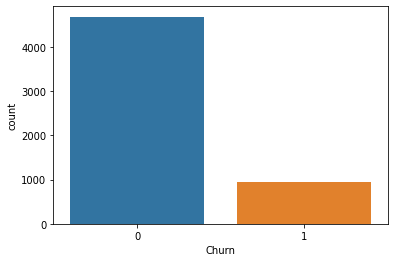

In [ ]:
sns.countplot(y)

In [ ]:
#2.Balancing using SMOTE technique

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


In [ ]:
# Resampling the minority class. The strategy can be changed as required.
smk = SMOTE(random_state=42)
X_res,y_res=smk.fit_resample(X,y)


In [ ]:
oversampled_smk = pd.concat([pd.DataFrame(y_res), pd.DataFrame(X_res)], axis=1)

In [ ]:
oversampled_smk.shape

(9364, 30)

In [ ]:
oversampled_smk.head()

,Churn,CityTier,Gender,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,CouponUsed,OrderCount,DaySinceLastOrder,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,3,0,3,2,9,1,1.0,1.0,5.0,...,0,0,0,0,1,0,0,0,0,1
1,1,1,1,4,3,7,1,0.0,1.0,0.0,...,0,1,0,0,0,1,0,0,0,1
2,1,1,1,4,3,6,1,0.0,1.0,3.0,...,0,0,0,0,0,1,0,0,0,1
3,1,3,1,4,5,8,0,0.0,1.0,3.0,...,0,0,0,0,1,0,0,0,0,1
4,1,1,1,3,5,3,0,1.0,1.0,3.0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
oversampled_smk.tail()

In [ ]:
col=X_res.columns

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))


Original dataset shape Counter({0: 4682, 1: 948})
Resampled dataset shape Counter({1: 4682, 0: 4682})


<AxesSubplot:xlabel='Churn', ylabel='count'>

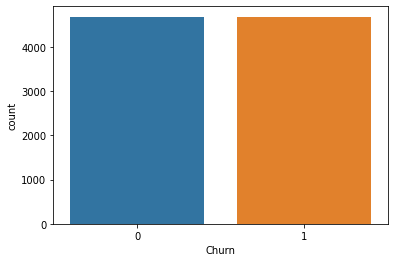

In [ ]:
sns.countplot(y_res)

In [ ]:
X_res.head(5)

,CityTier,Gender,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,CouponUsed,OrderCount,DaySinceLastOrder,PreferredLoginDevice,...,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Tenure_l10,WarehouseToHome_l10,CashbackAmount_l10,OrderAmountHikeFromlastYear_l10,HourSpendOnApp_l10
0,3,0,3,2,9,1,1.00,1.00,5.00,1,...,0,0,0,0,1,0.28,0.06,0.88,0.00,0.71
1,1,1,4,3,7,1,0.00,1.00,0.00,1,...,1,0,0,0,1,0.45,0.15,0.83,0.36,0.71
2,1,1,4,3,6,1,0.00,1.00,3.00,1,...,1,0,0,0,1,0.45,0.55,0.83,0.28,0.52
3,3,1,4,5,8,0,0.00,1.00,3.00,1,...,0,0,0,0,1,0.00,0.34,0.85,0.86,0.52
4,1,1,3,5,3,0,1.00,1.00,3.00,1,...,1,0,0,0,1,0.00,0.27,0.84,0.00,0.71


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)


In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)


100%|██████████| 29/29 [00:41<00:00,  1.42s/it]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.99,0.99,0.99,0.99,1.57
LabelSpreading,0.99,0.99,0.99,0.99,9.90
LabelPropagation,0.99,0.99,0.99,0.99,5.54
XGBClassifier,0.98,0.98,0.98,0.98,1.46
RandomForestClassifier,0.98,0.98,0.98,0.98,1.04
LGBMClassifier,0.97,0.97,0.97,0.97,0.45
BaggingClassifier,0.97,0.97,0.97,0.97,0.62
DecisionTreeClassifier,0.95,0.95,0.95,0.95,0.23
KNeighborsClassifier,0.95,0.95,0.95,0.95,0.37


In [ ]:
#Logistic Regression Analysis

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [ ]:
model_reg=log_reg.fit(X_train,y_train)

In [ ]:
y_pred=model_reg.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,precision_score,classification_report,recall_score,f1_score,accuracy_score
print("Accuracy score on Logistic Regression is:",accuracy_score(y_test,y_pred))

NameError: ignored

In [ ]:
print(confusion_matrix(y_test,y_pred))
print("Precision score on Logistic Regression is:",precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[811 128]
 [142 792]]
Precision score on Logistic Regression is: 0.8608695652173913
0.8543689320388348


In [ ]:
#KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
  knn=KNeighborsClassifier(n_neighbors=k)
model_knn=knn.fit(X_train,y_train)

In [ ]:
y_pred_knn=model_knn.predict(X_test)

In [ ]:
#plotting accuracy for different 'k' values 

In [ ]:
# finding different accuracies for k values
metric_k=[]
neighbors=range(3,18)

for k in neighbors:
    model1=KNeighborsClassifier(n_neighbors=k)
    model1=model1.fit(X_train,y_train)
    y_pred_knn=model1.predict(X_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

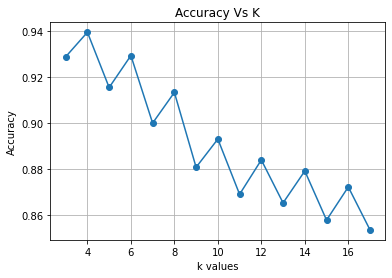

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.title('Accuracy Vs K')
plt.xlabel('k values')
plt.ylabel('Accuracy');
plt.grid();

In [ ]:
knn_opt=KNeighborsClassifier(n_neighbors=4)

In [ ]:
knn_opt=knn_opt.fit(X_train,y_train)
y_pred_knn_opt=knn_opt.predict(X_test)

In [ ]:
print("Accuracy score on KNN model is:",accuracy_score(y_test,y_pred_knn_opt))
print("Precision score on KNN model is:",precision_score(y_test,y_pred_knn_opt))


Accuracy score on KNN model is: 0.9396689802455953
Precision score on KNN model is: 0.9020568070519099


In [ ]:
print(confusion_matrix(y_test,y_pred_knn))
print(f1_score(y_test,y_pred))

[[676 263]
 [ 11 923]]
0.8543689320388348


In [ ]:
#Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt=dt_clf.predict(X_test)

In [ ]:
print("Accuracy score on Decision Tree classification model is:",accuracy_score(y_test,y_pred_dt))
print("Precision score on Decision Tree classification model is:",precision_score(y_test,y_pred_dt))


Accuracy score on Decision Tree classification model is: 0.9444741057127602
Precision score on Decision Tree classification model is: 0.9386892177589852


In [ ]:
#Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf=rf_clf.predict(X_test)

In [ ]:
print("Accuracy score on RandomForestClassifier classification model is:",accuracy_score(y_test,y_pred_rf))
print("Precision score on RandomForestClassifier classification model is:",precision_score(y_test,y_pred_rf))


Accuracy score on RandomForestClassifier classification model is: 0.9802455953016551
Precision score on RandomForestClassifier classification model is: 0.9736008447729673


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_pred_rf )) 

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       939
           1       0.97      0.99      0.98       934

    accuracy                           0.98      1873
   macro avg       0.98      0.98      0.98      1873
weighted avg       0.98      0.98      0.98      1873



In [ ]:
y_train[635]

0

In [ ]:
y_pred_rf[635]

1

<Axes: >

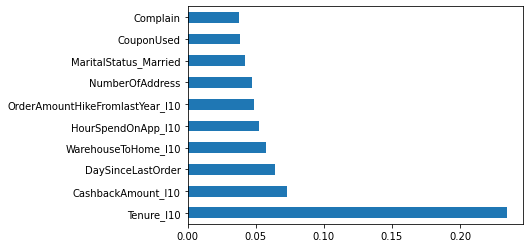

In [ ]:
feat_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
#Grid search CV

In [ ]:
#Defining hyper parameter space

In [ ]:
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [ ]:
#Running grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(rf_clf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X_train,y_train)

In [ ]:
#Evaluating Model Results

In [ ]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score on Random forest Grid search CV  is: '+str(model_grid.best_score_))

Best hyperparameters are: {'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score on Random forest Grid search CV  is: 0.9798424776398345


In [ ]:
#Randomized search CV

In [ ]:
from scipy.stats import randint

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf, rs_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=3)
pred_model_random = rf_random.fit(X_train,y_train)

In [ ]:
# random random search results
print('Best random search hyperparameters are: '+str(model_random.best_params_))
print('Best random search score is: '+str(model_random.best_score_))

Best random search hyperparameters are: {'criterion': 'entropy', 'max_depth': 40, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 360}
Best random search score is: 0.9823788546255506
